In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
wildfire_df = pd.read_csv("data.csv")

Will be making a new feature for time it took to contain the fire, do note that half of the data is missing regarding containtment date/ time.

In [8]:
print(wildfire_df.isnull().sum() )
print("Number of columns:", wildfire_df.shape[0])


Unnamed: 0                         0
OBJECTID                           0
FOD_ID                             0
FPA_ID                             0
SOURCE_SYSTEM_TYPE                 0
SOURCE_SYSTEM                      0
NWCG_REPORTING_AGENCY              0
NWCG_REPORTING_UNIT_ID             0
NWCG_REPORTING_UNIT_NAME           0
SOURCE_REPORTING_UNIT              0
SOURCE_REPORTING_UNIT_NAME         0
LOCAL_FIRE_REPORT_ID          432577
LOCAL_INCIDENT_ID             235150
FIRE_CODE                     465326
FIRE_NAME                     280832
ICS_209_INCIDENT_NUMBER       563796
ICS_209_NAME                  563797
MTBS_ID                       568015
MTBS_FIRE_NAME                568015
COMPLEX_NAME                  569704
FIRE_YEAR                          0
DISCOVERY_DATE                     0
DISCOVERY_DOY                      0
DISCOVERY_TIME                256949
STAT_CAUSE_DESCR                   0
CONT_DATE                     265523
CONT_DOY                      265523
C

Code in case we want to drop all Nan examples:

In [4]:
# wildfire_df.dropna(subset=["DISCOVERY_TIME", "CONT_TIME", "CONT_DATE"], inplace=True)

# def convert_datetime(df, date_column, time_column, datetime_column):
#  # Convert date column to datetime with Julian origin
#     df[date_column] = pd.to_datetime(df[date_column], unit='D', origin='julian')
    
#     # Extract hours and minutes from the time column
#     hours = df[time_column] // 100
#     minutes = df[time_column] % 100
    
#     # Create a timedelta representing the time
#     time_timedelta = pd.to_timedelta(hours, unit='h') + pd.to_timedelta(minutes, unit='m')
    
#     # Combine date and time into datetime
#     df[datetime_column] = df[date_column] + time_timedelta



# convert_datetime(wildfire_df, 'DISCOVERY_DATE', 'DISCOVERY_TIME', 'DISCOVERY_DATETIME')

# convert_datetime(wildfire_df, 'CONT_DATE', 'CONT_TIME', 'CONT_DATETIME')

# # print(wildfire_df)


Creating DISCOVERY_DATETIME CONT_DATETIME to calculate TIME_TO_CONT while Keeping NaN examples in data:

In [9]:
def convert_datetime(df, date_column, time_column, datetime_column):
    # Convert date column to datetime with Julian origin
    df[date_column] = pd.to_datetime(df[date_column], unit='D', origin='julian')
    
    # Extract hours and minutes from the time column
    mask = df[time_column].notna()  # Create a mask to identify non-NA values
    hours = df.loc[mask, time_column] // 100
    minutes = df.loc[mask, time_column] % 100
    
    # Create a timedelta representing the time
    time_timedelta = pd.to_timedelta(hours, unit='h') + pd.to_timedelta(minutes, unit='m')
    
    # Combine date and time into datetime
    df.loc[mask, datetime_column] = df.loc[mask, date_column] + time_timedelta
    
convert_datetime(wildfire_df, 'DISCOVERY_DATE', 'DISCOVERY_TIME', 'DISCOVERY_DATETIME')

convert_datetime(wildfire_df, 'CONT_DATE', 'CONT_TIME', 'CONT_DATETIME')

In [10]:
wildfire_df['TIME_TO_CONT'] = wildfire_df['CONT_DATETIME'] - wildfire_df['DISCOVERY_DATETIME']

Checking corelation between the time to contain by minutes to the cause:

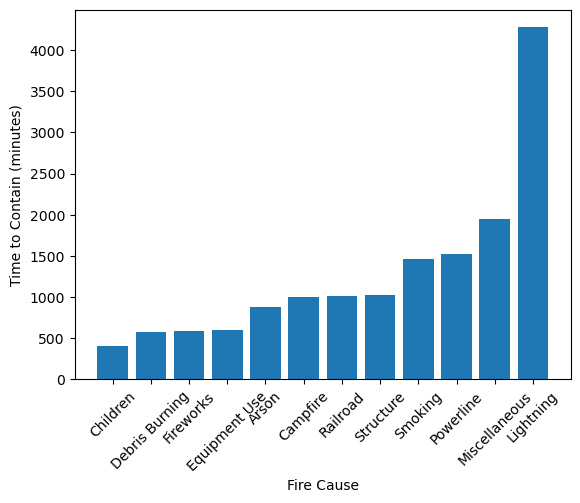

In [12]:
wildfire_df['TIME_TO_CONT_MINUTES'] = wildfire_df['TIME_TO_CONT'].dt.total_seconds() / 60

# Prepare data for the plot
categories = wildfire_df["STAT_CAUSE_DESCR"].unique()

# Calculate means and sort categories accordingly
means = wildfire_df.groupby("STAT_CAUSE_DESCR")["TIME_TO_CONT_MINUTES"].mean()
sorted_categories = sorted(categories, key=lambda x: means[x])

# Create the bar plot
plt.bar(sorted_categories, [means[cat] for cat in sorted_categories])
plt.xlabel("Fire Cause")
plt.ylabel("Time to Contain (minutes)")
plt.xticks(rotation=45)
plt.show()


In [13]:
print("Mean time to contain by cause:")
print(means)

Mean time to contain by cause:
STAT_CAUSE_DESCR
Arson              875.130502
Campfire           993.418465
Children           401.314893
Debris Burning     569.143259
Equipment Use      602.998968
Fireworks          587.162885
Lightning         4280.053426
Miscellaneous     1944.149601
Powerline         1527.204937
Railroad          1005.414476
Smoking           1458.871211
Structure         1023.887981
Name: TIME_TO_CONT_MINUTES, dtype: float64


Checking corelation between the Fire Size to the cause to look for similarities:

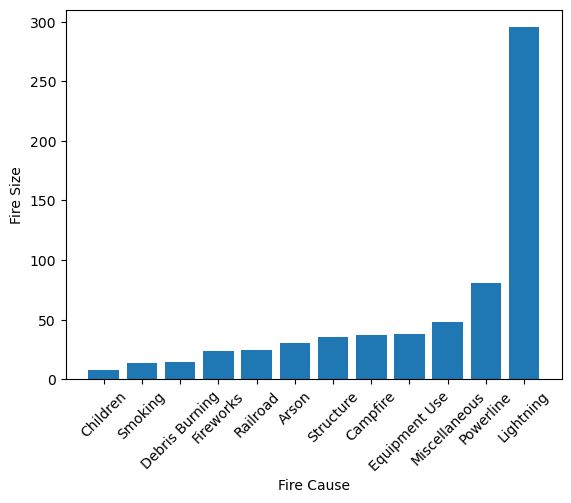

In [14]:
# Prepare data for the plot
categories = wildfire_df["STAT_CAUSE_DESCR"].unique()

# Calculate means and sort categories accordingly
means = wildfire_df.groupby("STAT_CAUSE_DESCR")["FIRE_SIZE"].mean()
sorted_categories = sorted(categories, key=lambda x: means[x])

# Create the bar plot
plt.bar(sorted_categories, [means[cat] for cat in sorted_categories])
plt.xlabel("Fire Cause")
plt.ylabel("Fire Size")
plt.xticks(rotation=45)
plt.show()


In [15]:
print("Mean time to contain by cause:")
print(means)

Mean time to contain by cause:
STAT_CAUSE_DESCR
Arson              30.676274
Campfire           37.324330
Children            7.371390
Debris Burning     14.719021
Equipment Use      37.892808
Fireworks          23.820233
Lightning         295.441598
Miscellaneous      47.604008
Powerline          80.448005
Railroad           24.329105
Smoking            13.336670
Structure          35.595463
Name: FIRE_SIZE, dtype: float64


As we can see, both Fire Size and Time to Contain corelate highly with lightning being the cause, but when it comes to other causes there is a bit of a difference

Looking for corelation with Fire Size Class, Time to Contain and Causes.

In [16]:
# data = wildfire_df

# # Group and calculate mean time to contain by cause and size class
# grouped_data = data.groupby(["STAT_CAUSE_DESCR", "FIRE_SIZE_CLASS"])["TIME_TO_CONT_MINUTES"].mean()

# # Extract categories and values
# categories = grouped_data.index.get_level_values("STAT_CAUSE_DESCR").unique()
# size_classes = grouped_data.index.get_level_values("FIRE_SIZE_CLASS").unique()
# means = grouped_data.values.reshape(len(categories), len(size_classes))

# # Create the bar plot with color encoding for size class
# plt.figure(figsize=(10, 6))
# for i, size_class in enumerate(size_classes):
#     plt.bar(categories, means[:, i], label=size_class, alpha=0.7)

# plt.xlabel("Fire Cause")
# plt.ylabel("Average Time to Contain (minutes)")
# plt.xticks(rotation=45)
# plt.legend(title="Fire Size Class")
# plt.tight_layout()
# plt.show()


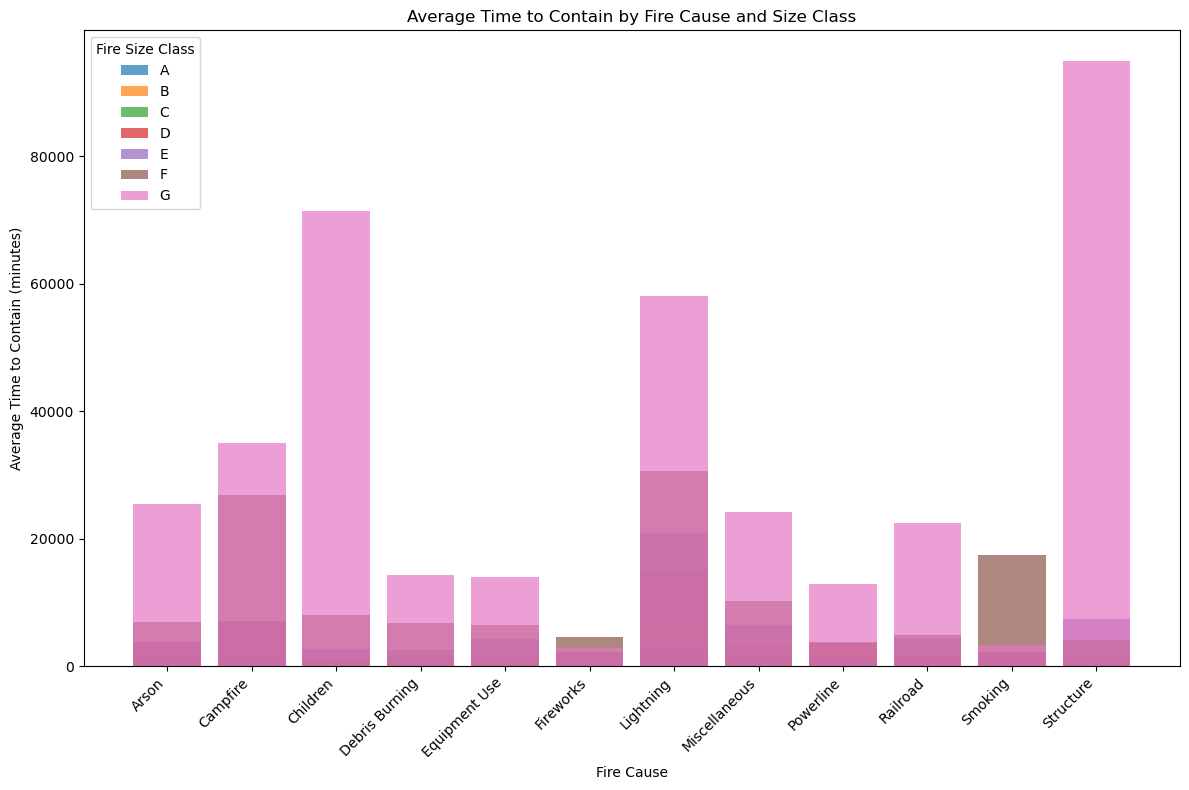

In [27]:
# Ensure the DataFrame is sorted by 'STAT_CAUSE_DESCR' and 'FIRE_SIZE_CLASS'
wildfire_df = wildfire_df.sort_values(by=["STAT_CAUSE_DESCR", "FIRE_SIZE_CLASS"])

# Group and calculate mean time to contain by cause and size class
grouped_data = wildfire_df.groupby(["STAT_CAUSE_DESCR", "FIRE_SIZE_CLASS"])["TIME_TO_CONT_MINUTES"].mean()

# Extract categories and values
categories = grouped_data.index.get_level_values("STAT_CAUSE_DESCR").unique().sort_values()
size_classes = grouped_data.index.get_level_values("FIRE_SIZE_CLASS").unique().sort_values()
means = grouped_data.values.reshape(len(categories), len(size_classes))

# Custom list of colors for 7 size classes
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Create the bar plot with color encoding for size class
plt.figure(figsize=(12, 8))
for i, size_class in enumerate(size_classes):
    plt.bar(categories, means[:, i], label=size_class, color=custom_colors[i], alpha=0.7)

plt.xlabel("Fire Cause")
plt.ylabel("Average Time to Contain (minutes)")
plt.title("Average Time to Contain by Fire Cause and Size Class")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Fire Size Class", loc='upper left')
plt.tight_layout()
plt.show()

In [28]:
grouped_df = wildfire_df.groupby("FIRE_SIZE_CLASS")

# Calculate mean, median, or other aggregations for "Time to Contain" within each group:

mean_contain_time = grouped_df["TIME_TO_CONT_MINUTES"].mean()
median_contain_time = grouped_df["TIME_TO_CONT_MINUTES"].median()

print("Mean time to contain by cause:")
print(mean_contain_time)

print("Median time to contain by cause:")
print(median_contain_time)


Mean time to contain by cause:
FIRE_SIZE_CLASS
A     1491.484952
B     1227.315624
C     1916.458682
D     6430.024830
E    11099.613218
F    20522.541620
G    47953.131868
Name: TIME_TO_CONT_MINUTES, dtype: float64
Median time to contain by cause:
FIRE_SIZE_CLASS
A       70.0
B       73.0
C      180.0
D      896.0
E     1830.0
F     5437.5
G    21740.0
Name: TIME_TO_CONT_MINUTES, dtype: float64


As we can see , most of our time to contain comes from classes E to G while the total distrubition of classes in data is:

In [29]:
fire_size_class_counts = wildfire_df["FIRE_SIZE_CLASS"].value_counts()

# Print the counts
print(fire_size_class_counts)


B    284175
A    204830
C     66119
D      8555
E      4226
F      2355
G      1165
Name: FIRE_SIZE_CLASS, dtype: int64


We can also see how time to contain in minutes relates to the Fire Size Class Pretty well here:

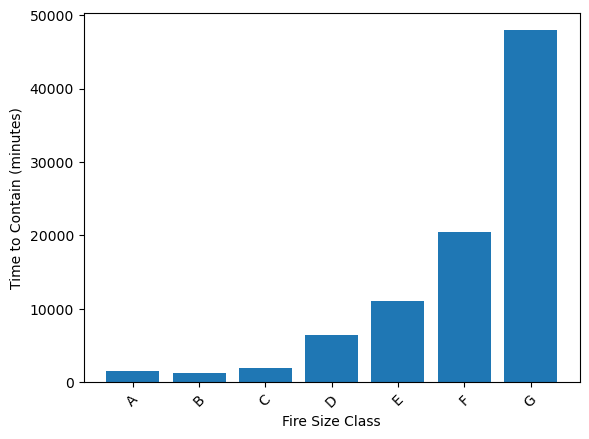

In [30]:
# Load data (assuming wildfire_df is available)
data = wildfire_df

# Prepare data for the plot
categories = sorted(data["FIRE_SIZE_CLASS"].unique())  # Sort categories alphabetically

# Calculate means
means = data.groupby("FIRE_SIZE_CLASS")["TIME_TO_CONT_MINUTES"].mean()

# Map means to sorted categories
sorted_means = [means[cat] for cat in categories]

# Create the bar plot
plt.bar(categories, sorted_means)
plt.xlabel("Fire Size Class")
plt.ylabel("Time to Contain (minutes)")
plt.xticks(rotation=45)
plt.show()


In [31]:
print("Mean time to contain by cause:")
print(means)

Mean time to contain by cause:
FIRE_SIZE_CLASS
A     1491.484952
B     1227.315624
C     1916.458682
D     6430.024830
E    11099.613218
F    20522.541620
G    47953.131868
Name: TIME_TO_CONT_MINUTES, dtype: float64


We can try and see a correlation between Fire Size and Time to Contain:

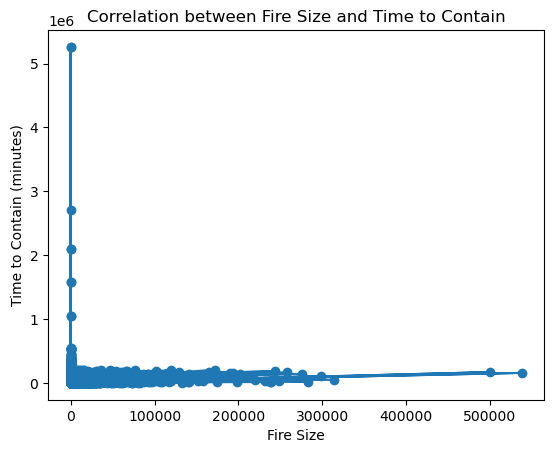

In [32]:
# Load data (assuming wildfire_df is available)
data = wildfire_df

# Create a line plot without sorting
plt.plot(data["FIRE_SIZE"], data["TIME_TO_CONT_MINUTES"], marker='o', linestyle='-')
plt.xlabel("Fire Size")
plt.ylabel("Time to Contain (minutes)")
plt.title("Correlation between Fire Size and Time to Contain")
plt.show()


In [33]:
# Maximum time to contain
max_time_to_contain = wildfire_df['TIME_TO_CONT_MINUTES'].max()

# Minimum time to contain
min_time_to_contain = wildfire_df['TIME_TO_CONT_MINUTES'].min()

print("Maximum Time to Contain:", max_time_to_contain, "minutes")
print("Minimum Time to Contain:", min_time_to_contain, "minutes")


Maximum Time to Contain: 5260380.0 minutes
Minimum Time to Contain: 0.0 minutes


As we can see we got really big time to contain values that look like outliers, let's check the plot for only up tp 2 months contain time:

In [34]:
# Calculate the threshold in minutes for 2 months
threshold_minutes = 2 * 30 * 24 * 60  # 2 months * 30 days/month * 24 hours/day * 60 minutes/hour

# Filter out samples with TIME_TO_CONT bigger than threshold
filtered_df = wildfire_df[wildfire_df['TIME_TO_CONT_MINUTES'] <= threshold_minutes]

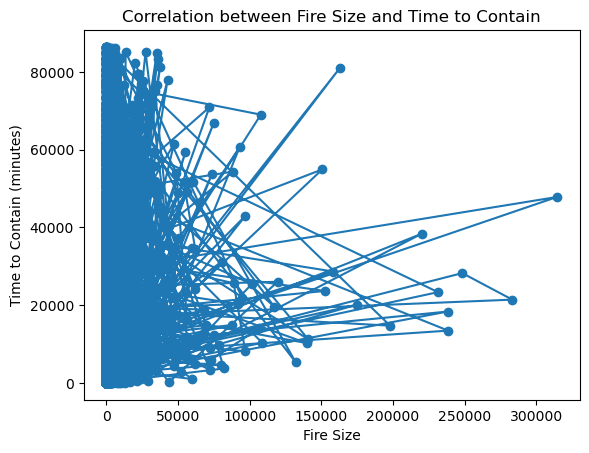

In [35]:

# Load data (assuming wildfire_df is available)
data = filtered_df

# Create a line plot without sorting
plt.plot(data["FIRE_SIZE"], data["TIME_TO_CONT_MINUTES"], marker='o', linestyle='-')
plt.xlabel("Fire Size")
plt.ylabel("Time to Contain (minutes)")
plt.title("Correlation between Fire Size and Time to Contain")
plt.show()


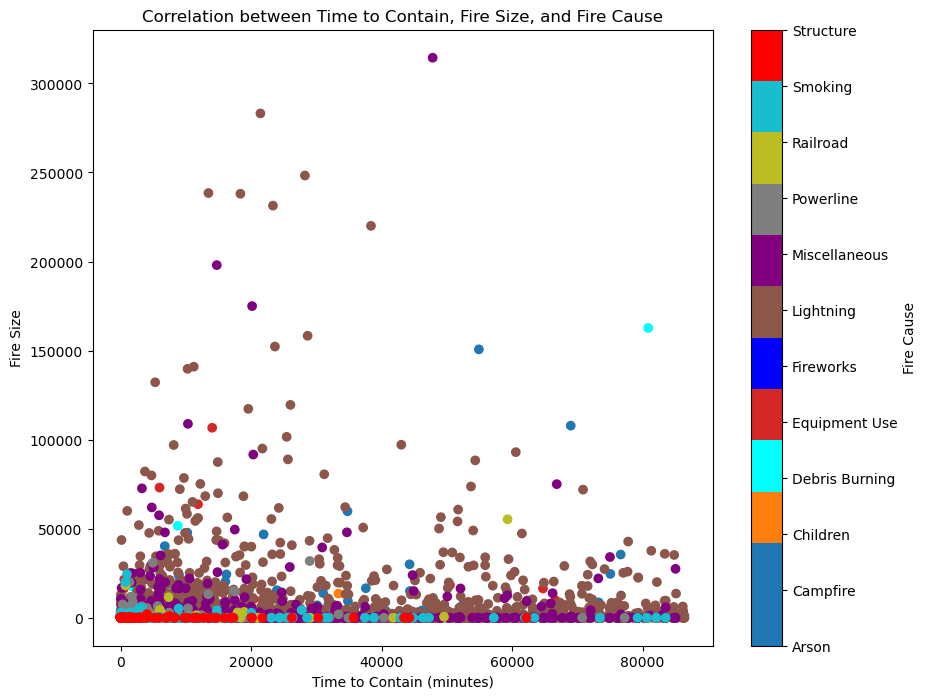

In [36]:
# Load data (assuming filtered_df is available)
data = filtered_df

# Get unique fire causes
unique_causes = data["STAT_CAUSE_DESCR"].unique()
num_causes = len(unique_causes)

# Create a custom colormap with more than 10 distinct colors
custom_colors = plt.cm.get_cmap('tab10', num_causes)
custom_cmap = ListedColormap(custom_colors(np.linspace(0, 1, num_causes)))

# Define colors for specific categories
custom_colors_dict = {
    'Structure': 'red',
    'Fireworks': 'blue',
    'Debris Burning': 'cyan',
    'Miscellaneous': 'purple'
}

# Update the custom colormap with the specified colors
for cause, color in custom_colors_dict.items():
    if cause in unique_causes:
        idx = np.where(unique_causes == cause)[0][0]
        custom_cmap.colors[idx] = plt.cm.colors.to_rgba(color)

# Create a larger figure
plt.figure(figsize=(10, 8))

# Create a scatter plot with color mapping using the custom colormap
scatter = plt.scatter(data["TIME_TO_CONT_MINUTES"], data["FIRE_SIZE"], c=data["STAT_CAUSE_DESCR"].astype('category').cat.codes, cmap=custom_cmap)

# Create a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Fire Cause')

# Customize colorbar ticks and labels
ticks = np.arange(len(unique_causes))
cbar.set_ticks(ticks)
cbar.set_ticklabels(unique_causes)

plt.xlabel("Time to Contain (minutes)")
plt.ylabel("Fire Size")
plt.title("Correlation between Time to Contain, Fire Size, and Fire Cause")
plt.show()


In [37]:
correlation = wildfire_df["FIRE_SIZE"].corr(wildfire_df["TIME_TO_CONT_MINUTES"])

In [38]:
print("Correlation between FIRE_SIZE and TIME_TO_CONT_MINUTES:", correlation)

Correlation between FIRE_SIZE and TIME_TO_CONT_MINUTES: 0.10723652411972122


As we can see, we don't see any clear corelation, let's check for the maximum containment times that looked like outliers:

In [39]:
# Sort the DataFrame based on "TIME_TO_CONT_MINUTES" column in descending order
sorted_df = wildfire_df.sort_values(by="TIME_TO_CONT_MINUTES", ascending=False)

# Select the top 10 examples
top_10_examples = sorted_df.head(10)

# Display the top 10 examples along with "FIRE_SIZE" and "STAT_CAUSE_DESCR"
print(top_10_examples[["TIME_TO_CONT_MINUTES", "FIRE_SIZE", "STAT_CAUSE_DESCR", "DISCOVERY_DATETIME", "CONT_DATETIME"]])

        TIME_TO_CONT_MINUTES  FIRE_SIZE STAT_CAUSE_DESCR  DISCOVERY_DATETIME  \
564979             5260380.0        0.5   Debris Burning 1999-07-19 11:00:00   
387970             5260335.0        0.1    Miscellaneous 1999-08-11 14:00:00   
436966             2708760.0      120.0        Lightning 2000-08-07 16:00:00   
461006             2103885.0        0.4   Debris Burning 2004-12-04 14:30:00   
174258             2103872.0        0.1            Arson 1998-07-27 12:05:00   
225619             1579613.0        0.3    Miscellaneous 2006-06-23 13:00:00   
247589             1578347.0        1.0        Powerline 2006-08-03 16:37:00   
477141             1052640.0      250.0            Arson 2003-03-25 14:00:00   
555856             1051212.0        0.1   Debris Burning 2000-04-14 16:58:00   
203007              545760.0        0.1    Miscellaneous 2003-03-28 15:10:00   

             CONT_DATETIME  
564979 2009-07-19 12:00:00  
387970 2009-08-11 14:15:00  
436966 2005-10-01 18:00:00  
461

As we can see, we got some data which looks as if there might be a mistake in the discovery or cont year that was put in.
Let us check data for two months, if we use the feature we might need to decide beforehand what we do with outliers like that (and how long is a normal containment time for a fire)

In [43]:
# Convert 2 months to minutes 
two_months_minutes = 2 * 30 * 24 * 60

# Filter examples where "TIME_TO_CONT_MINUTES" exceeds 2 months
examples_passed_two_months = wildfire_df[wildfire_df["TIME_TO_CONT_MINUTES"] > two_months_minutes]

# Count the number of examples that passed the 2 months mark
num_examples_passed_two_months = len(examples_passed_two_months)

print("Number of examples that passed the 2 months mark:", num_examples_passed_two_months)

Number of examples that passed the 2 months mark: 0


In [44]:
examples_passed_two_months_index = wildfire_df[wildfire_df["TIME_TO_CONT_MINUTES"] > two_months_minutes].index
wildfire_df = wildfire_df.drop(examples_passed_two_months_index)

In [45]:
# Sort the DataFrame based on "TIME_TO_CONT_MINUTES" column in descending order
sorted_df = wildfire_df.sort_values(by="TIME_TO_CONT_MINUTES", ascending=False)

# Select the top 10 examples
top_10_examples = sorted_df.head(10)

# Display the top 10 examples along with "FIRE_SIZE" and "STAT_CAUSE_DESCR"
print(top_10_examples[["TIME_TO_CONT_MINUTES", "FIRE_SIZE", "STAT_CAUSE_DESCR", "DISCOVERY_DATETIME", "CONT_DATETIME"]])

        TIME_TO_CONT_MINUTES  FIRE_SIZE STAT_CAUSE_DESCR  DISCOVERY_DATETIME  \
251505               86400.0     1324.0        Lightning 2008-06-21 12:00:00   
102560               86395.0        1.0        Lightning 2001-08-12 16:35:00   
242812               86395.0        1.0        Lightning 2001-08-12 16:35:00   
530939               86395.0        1.0        Lightning 2001-08-12 16:35:00   
312951               86339.0      106.0        Lightning 2015-07-08 15:31:00   
405885               86328.0       82.9        Lightning 2004-07-14 17:45:00   
466383               86299.0      221.0        Lightning 2000-08-14 09:40:00   
149900               86280.0       10.0        Lightning 2009-08-02 14:00:00   
207260               86232.0       96.0        Lightning 2006-07-12 12:48:00   
127504               86219.0     3853.0        Lightning 2014-08-25 15:01:00   

             CONT_DATETIME  
251505 2008-08-20 12:00:00  
102560 2001-10-11 16:30:00  
242812 2001-10-11 16:30:00  
530